# Libraries and datasets

In [1]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt

import re

In [10]:
births = pd.read_csv('../data/processed/totDF_dwnsmpl_clean.csv')

In [3]:
colnames = np.array(births.columns)
colnames

array(['Unnamed: 0', 'birth_year', 'birth_month', 'birth_time',
       'birth_day_of_wk', 'birth_place', 'mothers_age_imputed',
       'mothers_age', 'mothers_nativity', 'mothers_residence_status',
       'mothers_race', 'mothers_race_imputed', 'mothers_hispanic_origin',
       'mothers_hispanic_origin2', 'paternity_acknow',
       'mothers_marital_status', 'mothers_maristat_imputed',
       'mothers_education', 'fathers_age', 'fathers_race',
       'fathers_hispanic_origin', 'fathers_hispanic_origin2',
       'fathers_education', 'prior_living_births', 'prior_dead_births',
       'prior_terminations', 'mo_since_last_live_birth',
       'mo_since_last_other_birth', 'mo_prenatal_care_began',
       'n_prenatal_visits', 'wic', 'cigs_tri1', 'cigs_tri2', 'cigs_tri3',
       'mothers_height', 'mothers_bmi', 'pre_preg_lbs', 'delivery_lbs',
       'pre_preg_diab', 'gest_diab', 'pre_preg_hypten', 'gest_hypten',
       'hypten_ecl', 'prev_preterm_birth', 'infertility_treatment',
       'fertil_

## Functions

In [21]:
def pct_bplot(dataframe, group = str, target = 'admit_NICU', columns_titles = ['Y','N'] ):
    df1 = dataframe.groupby([group])[[target]].count()
    df2 =  dataframe.groupby([group])[target].value_counts().unstack()
    df2 = df2.reindex(columns=columns_titles)
    df3 = pd.merge(df1,df2, left_index = True, right_index = True)
    pct_df = pd.DataFrame(list(map(lambda x: df3[x]/df3[target] * 100, df3.columns[1:])))
    pct_df = pct_df.T
    pct_df.plot(kind = 'bar', stacked = True)

In [5]:
def plot_gpYR(df,col,xlab,ylab,title,kind='line'):
    groupDF = df.groupby('birth_year')[col].value_counts().unstack()
    plt.figure(figsize=(20,20))
    groupDF.plot(kind=kind,logy=True, legend=True)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    return

# Visualizations


## NICU admittance

<Figure size 1440x1440 with 0 Axes>

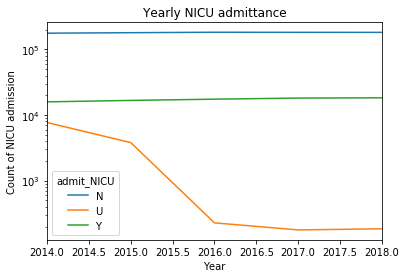

In [7]:
#NICU admiitance time series, 2014-2018
births['admit_NICU'] = births['admit_NICU'].replace(' ', 'U')
plot_gpYR(births,'admit_NICU',"Year","Count of NICU admission", "Yearly NICU admittance",kind='line')

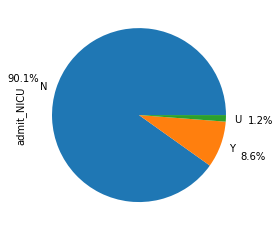

In [9]:
#NICU admit pie chart, all year (2014-2018)
births['admit_NICU'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', pctdistance = 1.4)

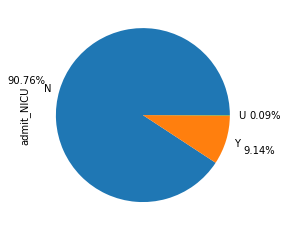

In [12]:
#NICU admit pie chart, year (2018) only
births.loc[births['birth_year']==2018]['admit_NICU'].value_counts().plot(kind = 'pie', autopct='%1.2f%%', pctdistance = 1.4)

## Mother health files

### Mother's BMI

In [48]:
births['mother_bmi_recode'] = pd.cut(births['mothers_bmi'],[10.0,19.0, 25.0,30.0,35.0,40.0,90.0], labels = ['u','h','o','ob1','ob2','ob3'])

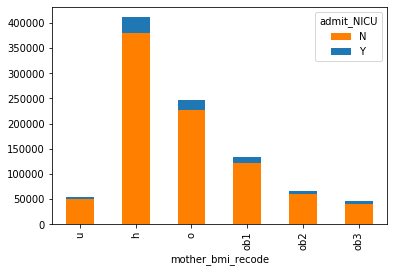

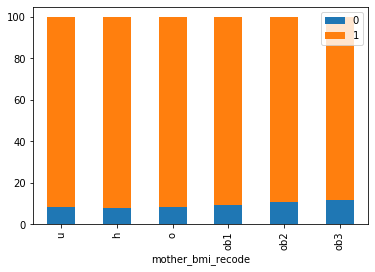

In [65]:
bmi_plt = births.loc[births['admit_NICU'] != 'U'].groupby(['mother_bmi_recode'])['admit_NICU'].value_counts().unstack()
bmi_plt.plot(kind = 'bar', stacked = True, color = ['#ff7f00','#1f77b4'])
pct_bplot(births,'mother_bmi_recode')

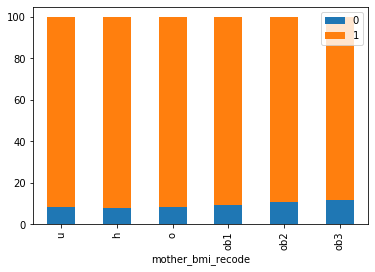

In [50]:
pct_bplot(births,'mother_bmi_recode')

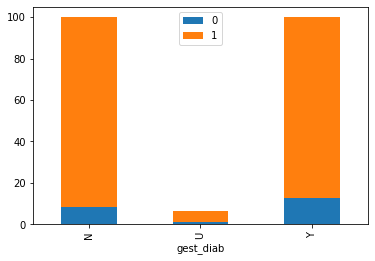

In [29]:
pct_bplot(births,'gest_diab')

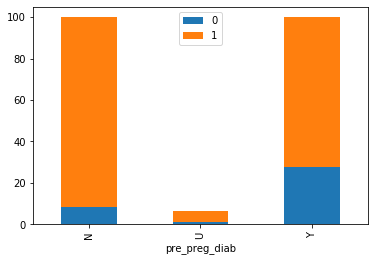

In [31]:
pct_bplot(births,'pre_preg_diab')